<a href="https://colab.research.google.com/github/AndrewKruszka/NeuralMachineLearning/blob/main/NoiseInSignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1(b) **Noise in Signals**
In signal processing and physics, noise refers to a random variation of signal that affects measurements and communications. Different types of noise have different statistical properties and spectral distributions

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fftpack as fft

## **White Noise**
White Noise is a random signal with a flat power spectral density, meaning it has equal intensity at all frequencies

### **Mathematical Representation**
White noise is often modeled as a sequence of independent and identically distributed (i.i.d.) random variables:

\begin{equation}
X(t) \sim \mathcal{N}(0, \sigma^2)
\end{equation}

where:\
**\( X(t) \)** is the white noise signal.

\begin{equation}
\mathcal{N}(0, \sigma^2) \end{equation} denotes a **Normal distribution** with **mean = 0** and **variance = \( σ^2 \)**.\

In [10]:
n_samples = 10000  # Number of samples
sigma = 1  # Standard deviation of noise

white_noise = np.random.normal(0, sigma, n_samples) # Generate White Noise

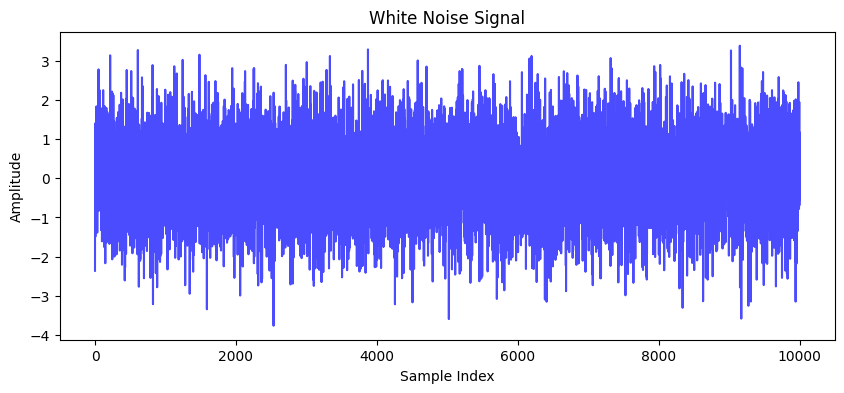

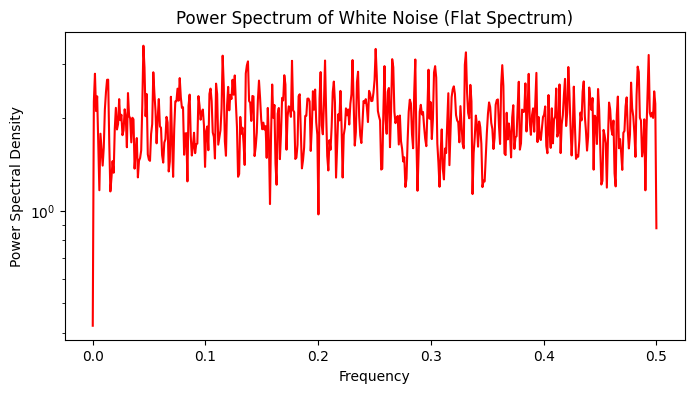

In [11]:
plt.figure(figsize=(10,4))
plt.plot(white_noise, color='b', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("White Noise Signal")
plt.show()

freqs, psd = signal.welch(white_noise, fs=1.0, nperseg=1024)

plt.figure(figsize=(8,4))
plt.semilogy(freqs, psd, color='r')
plt.xlabel("Frequency")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectrum of White Noise (Flat Spectrum)")
plt.show()

The first chart, **White Noise Signal**, displays the white noise signal overtime, with the x-axis representing time and the y-axis representing intensity

The second chart, **Power Spectrum of White Noise**, displays the PSD, which desribes how the power/energy of the noise is distributed across different frequencies. The x-axis represents frequency while the y-axis represents power at each frequency.

As shown, no frequency dominates the noise, meaning it is random across all frequency ranges

## **Brownian Noise
Brownian Noise, also known as random walk noise, is generated by integrating white noise over time. It represents cumulative changes where each step is influenced by a random perturbation

### **Mathematical Representation**
Brownian noise \( B(t) \) is the **cumulative sum of white noise**:

\begin{equation}
B(t) = B(t-1) + W(t)
\end{equation}

Where:\
**\( B(t) \)** is the Brownian noise at time step \( t \).\
**\( W(t) \)** is a white noise sample at time \( t \)\
**\( B(0) = 0 \)** is the starting value.

In [12]:
n_samples = 10000  # Number of samples

white_noise = np.random.normal(0, 1, n_samples) # Generate White Noise (basis for Brownian noise)

brownian_noise = np.cumsum(white_noise)  # Compute Brownian Noise by taking the cumulative sum

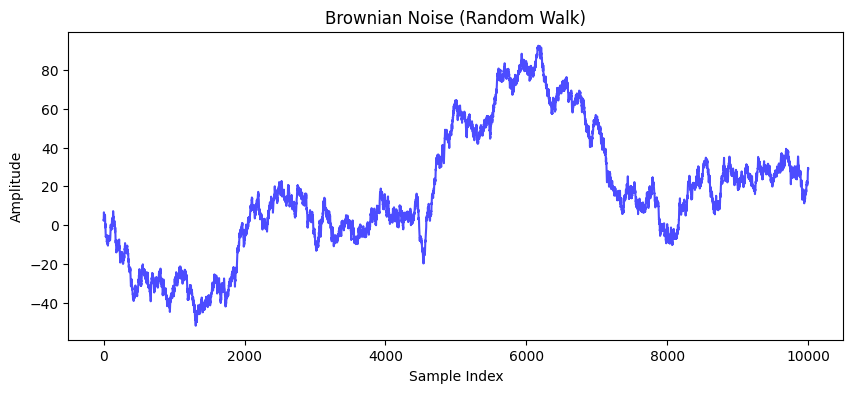

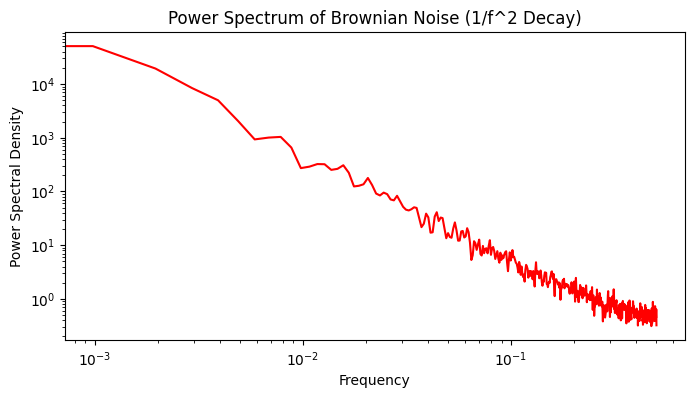

In [13]:
plt.figure(figsize=(10,4))
plt.plot(brownian_noise, color='b', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Brownian Noise (Random Walk)")
plt.show()

freqs, psd = signal.welch(brownian_noise, fs=1.0, nperseg=1024)

plt.figure(figsize=(8,4))
plt.loglog(freqs, psd, color='r')  # Log-log scale to show 1/f^2 behavior
plt.xlabel("Frequency")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectrum of Brownian Noise (1/f^2 Decay)")
plt.show()

The first chart above, **Brownian Noise (Random Walk)**, displays the Brownian Noise signal over time. The x-axis represents time while the y-axis shows the cumulative sum of white noise at each time step

The second chart, **Power Spectrum of Brownian Noise**, shows the PSD, which describes how the power/energy of the noise is distributed across different frequencies. The x-axis represents frequency while the y-axis represents power at each frequency

## **Pink Noise**
Pink Noise is a type of noise where power decreases as frequency increases. Unlike white noise (which has equal power at all frequencies), pink noise follows a Power Decay, meaning lower frequencies have more power than higher frequencies

### **Mathematical Representation**
Pink noise follows the power law:

\begin{equation}
P(f) \propto \frac{1}{f}
\end{equation}

where:
**\( P(f) \)** is the power at frequency \( f \).

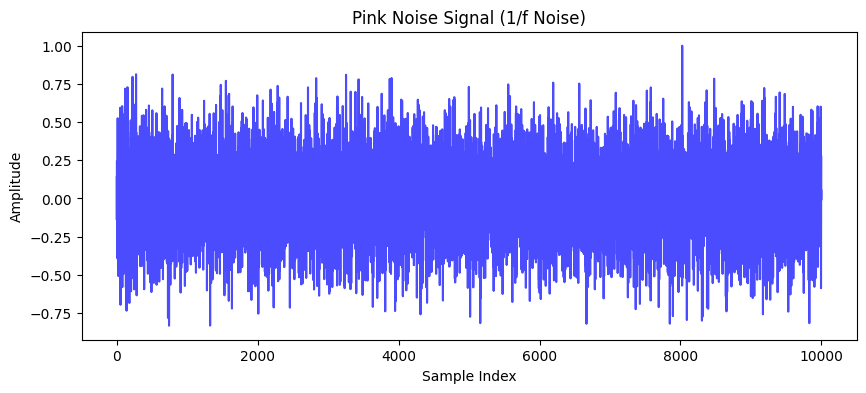

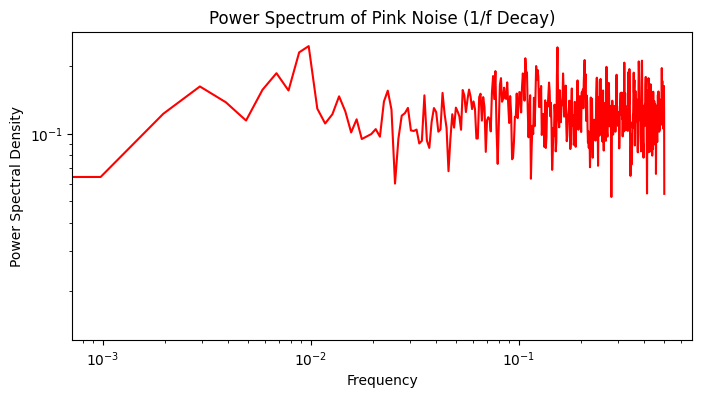

In [14]:
def generate_pink_noise(n_samples):
    """
    Generate pink noise using Voss-McCartney algorithm.
    """
    num_columns = 16  # Number of random processes to average
    array = np.random.randn(num_columns, n_samples)
    pink_noise = np.cumsum(array, axis=0)[-1]  # Sum over rows
    pink_noise /= np.max(np.abs(pink_noise))  # Normalize
    return pink_noise

n_samples = 10000  # Number of samples

pink_noise = generate_pink_noise(n_samples) # Generate Pink Noise

plt.figure(figsize=(10,4))
plt.plot(pink_noise, color='b', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Pink Noise Signal (1/f Noise)")
plt.show()

freqs, psd = signal.welch(pink_noise, fs=1.0, nperseg=1024)

plt.figure(figsize=(8,4))
plt.loglog(freqs, psd, color='r')  # Log-log scale to show 1/f behavior
plt.xlabel("Frequency")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectrum of Pink Noise (1/f Decay)")
plt.show()


The first chart, **Pink Noise Signal**, shows the Pink Noise signal over time. The x-axis represents time while the y-axis displays the flucuating intensity of the pink noise

The second chart, **Power Spectrum of Pink Noise**, shows the PSD, which describes how the power of the noise is distributed across different frequencies. The x-axis represents frequency while the y-axis represents the power at each frequency.